### Linear Plot code

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [24]:
data_hebbian= np.load("results_hebbian.npz")
data_non_binary = np.load("results_non_binary.npz")

In [25]:
results_hebbian = data_hebbian["results"]
results_non_binary = data_non_binary["results"]
results_more_neurons = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [26]:
train_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

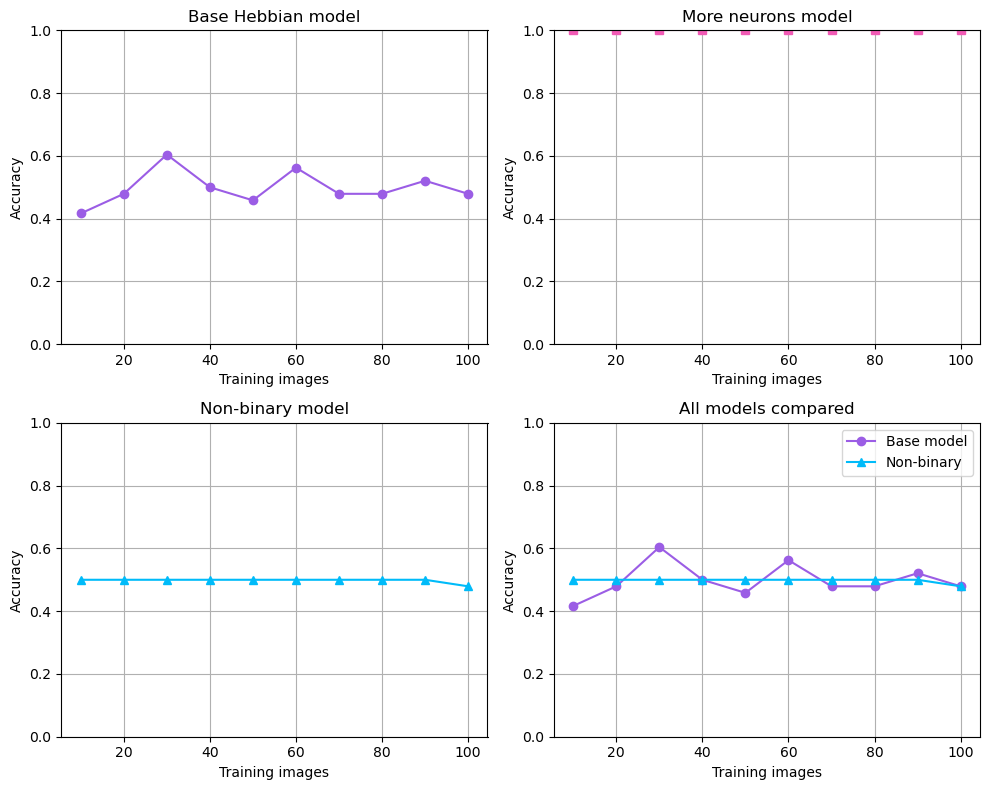

In [27]:
color_hebbian = "#9b5de5"      # violet-purple
color_more_neurons = "#f15bb5" # hot pink
color_non_binary = "#00bbf9"   # cyan

# --- Create figure with subplots ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # make it easy to index as a 1D array

# --- Plot 1: Base model ---
axes[0].plot(train_counts, results_hebbian, 'o-', color=color_hebbian)
axes[0].set_title("Base Hebbian model")
axes[0].set_xlabel("Training images")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
axes[0].grid(True)

# --- Plot 2: More neurons model ---
axes[1].plot(train_counts, results_more_neurons, 's-', color=color_more_neurons)
axes[1].set_title("More neurons model")
axes[1].set_xlabel("Training images")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0, 1)
axes[1].grid(True)

# --- Plot 3: Non-binary model ---
axes[2].plot(train_counts, results_non_binary, '^-', color=color_non_binary)
axes[2].set_title("Non-binary model")
axes[2].set_xlabel("Training images")
axes[2].set_ylabel("Accuracy")
axes[2].set_ylim(0, 1)
axes[2].grid(True)

# --- Plot 4: Combined comparison ---
axes[3].plot(train_counts, results_hebbian, 'o-', color=color_hebbian, label='Base model')
# axes[3].plot(train_counts, results_more_neurons, 's-', color=color_more_neurons, label='More neurons')
axes[3].plot(train_counts, results_non_binary, '^-',  color=color_non_binary, label='Non-binary')
axes[3].set_title("All models compared")
axes[3].set_xlabel("Training images")
axes[3].set_ylabel("Accuracy")
axes[3].set_ylim(0, 1)
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


### Confusion Matrix Plots

In [31]:
confs_hebbian = data_hebbian["confs"]
confs_non_binary = data_non_binary["confs"]
confs_more_neurons = confs_hebbian

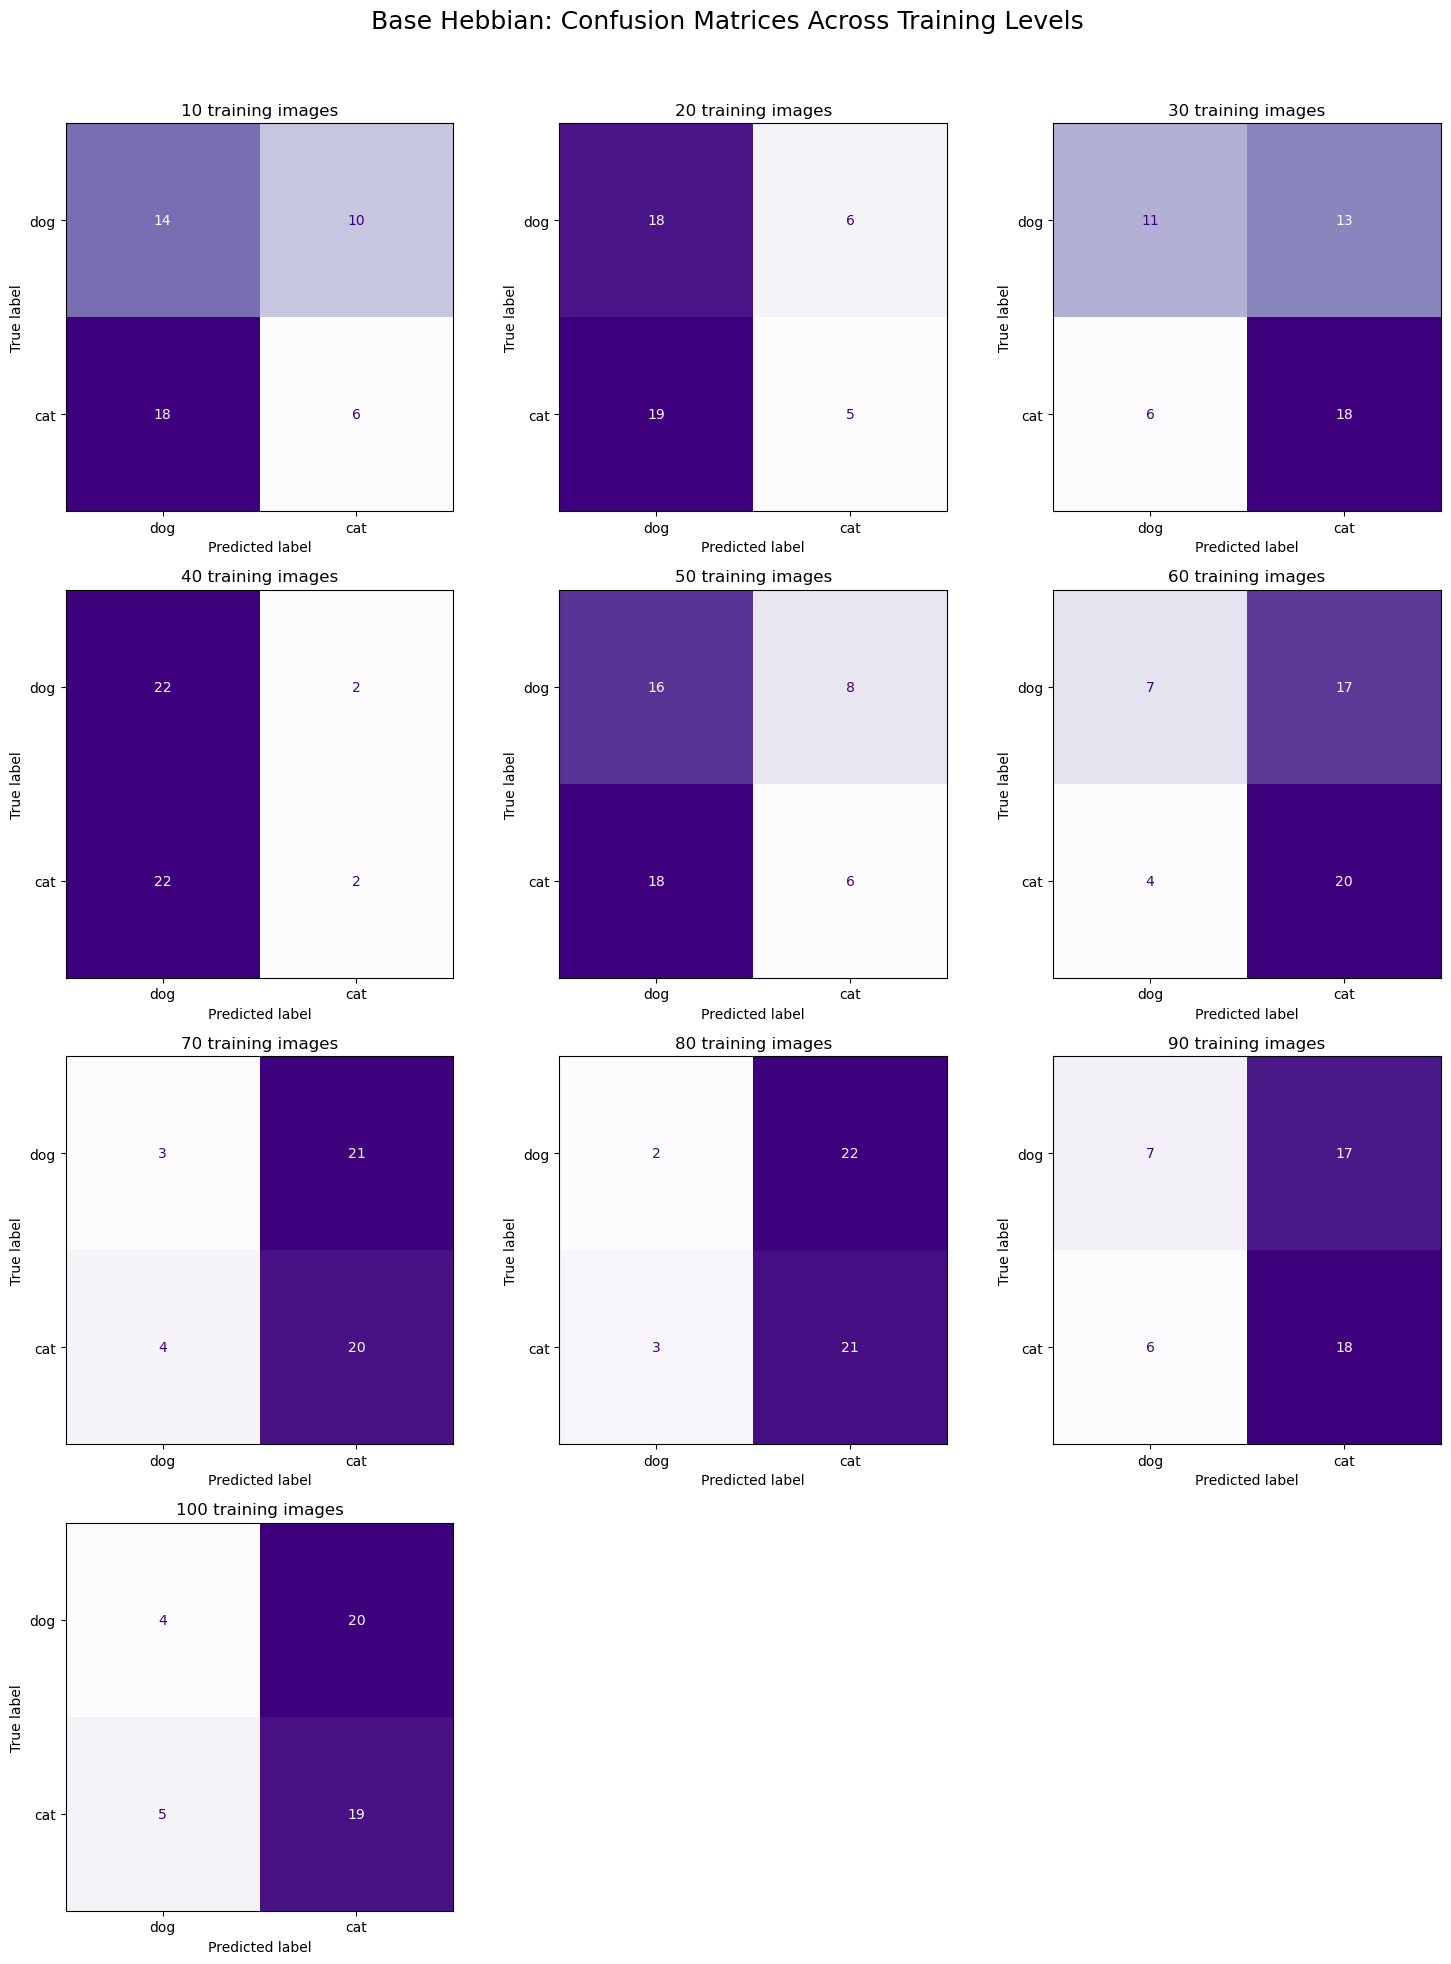

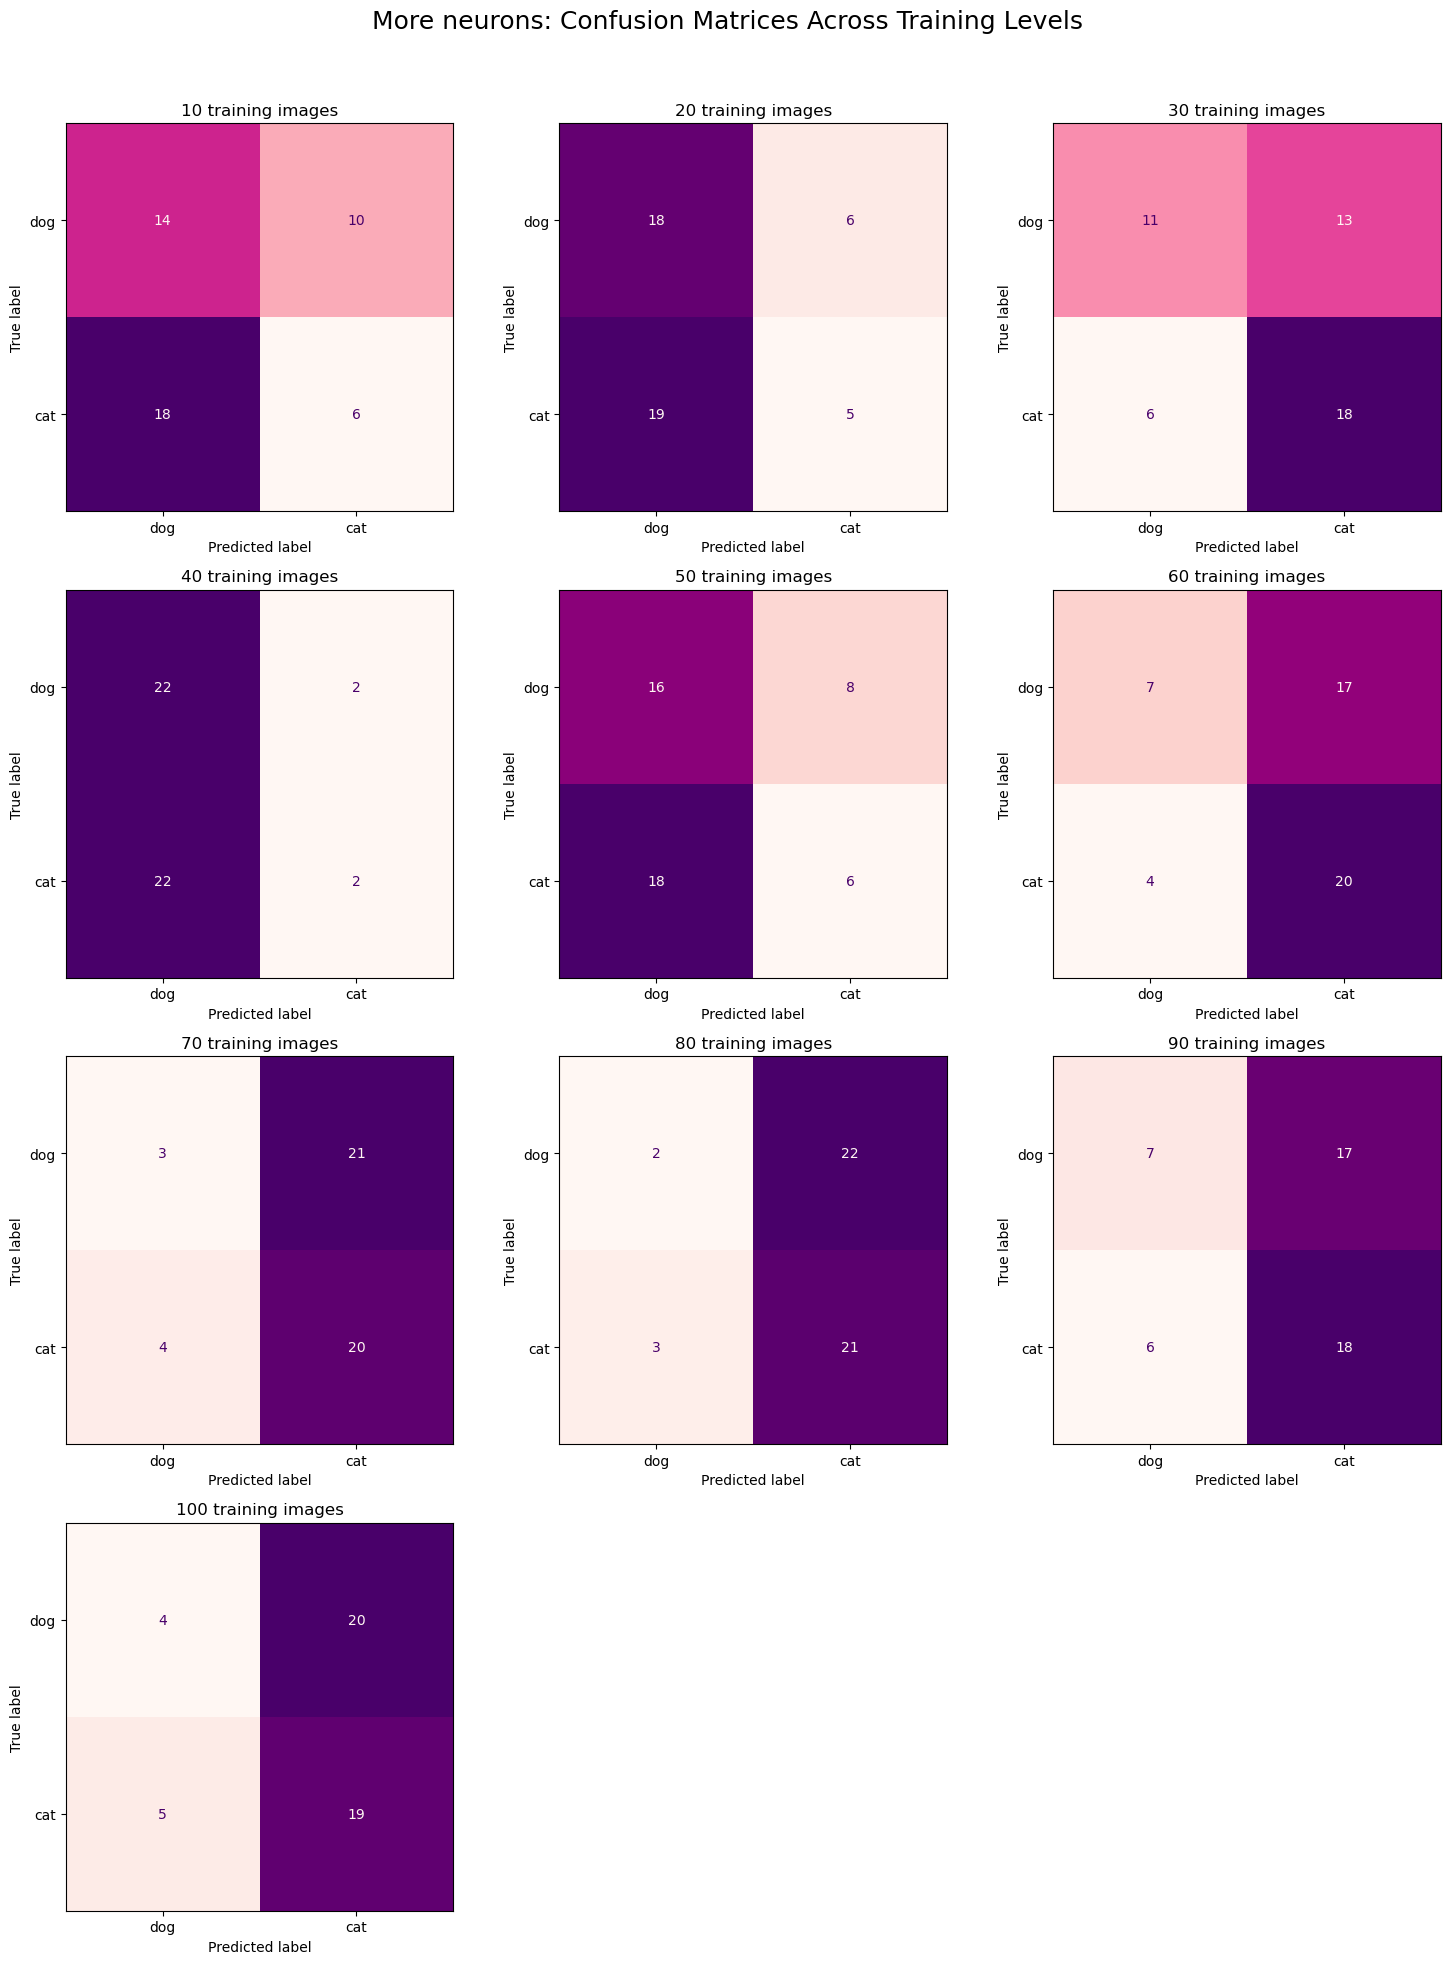

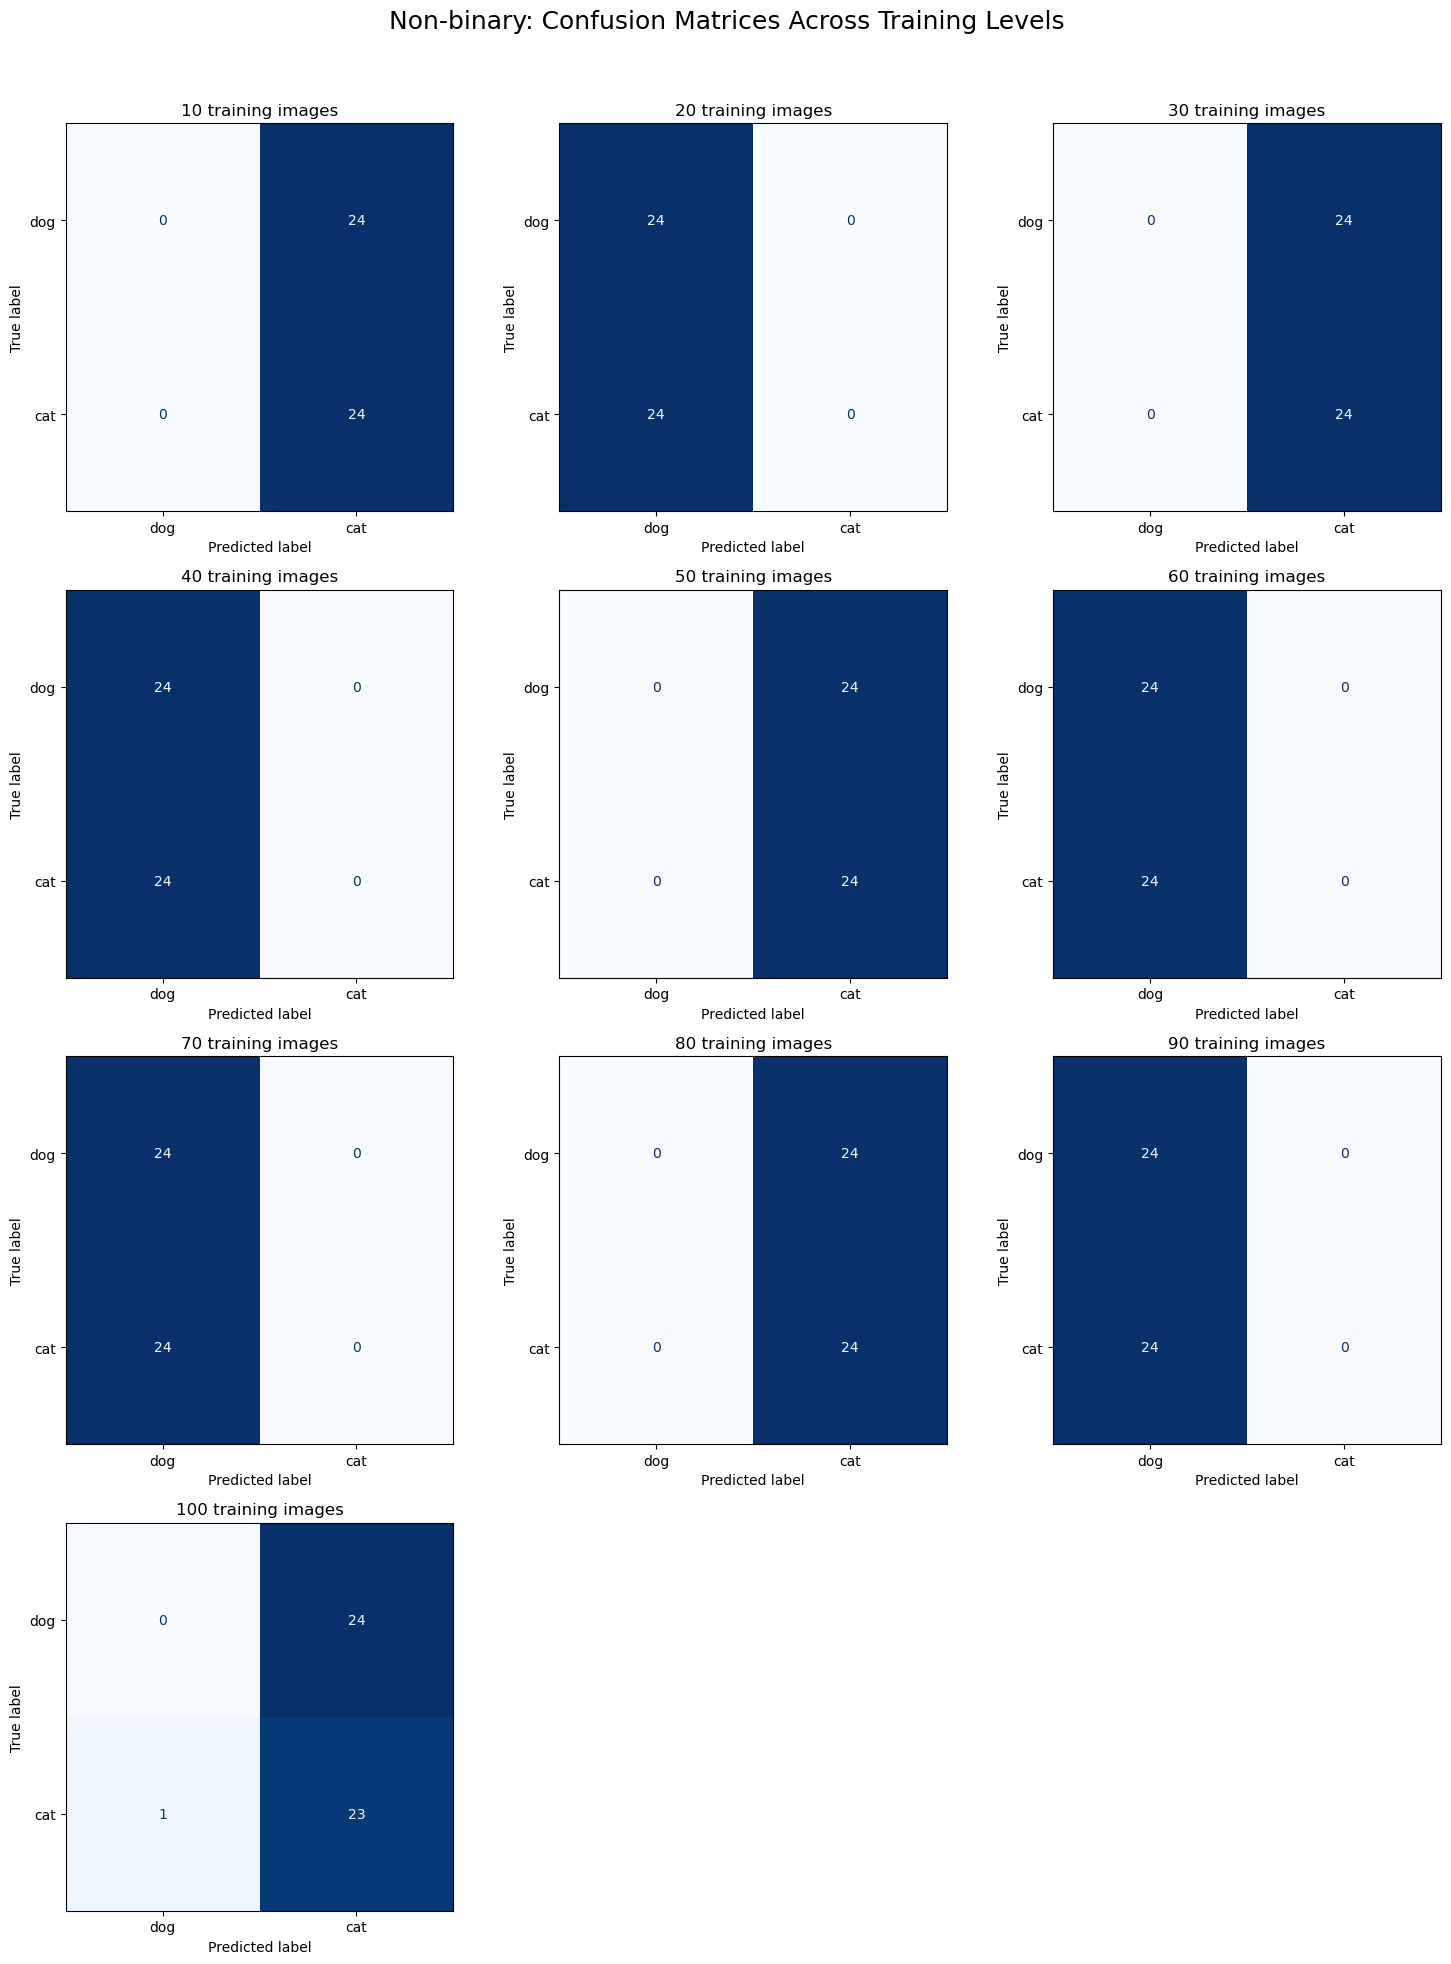

In [34]:
models = {
    "Base Hebbian": {
        "results": results_hebbian,
        "confs": confs_hebbian,
        "color": "Purples"
    },
    "More neurons": {
        "results": results_more_neurons,
        "confs": confs_more_neurons,
        "color": plt.cm.RdPu
    },
    "Non-binary": {
        "results": results_non_binary,
        "confs": confs_non_binary,
        "color": "Blues"
    }
}

# Plotting the confusion matrices
for model_name, model_data in models.items():
    conf_matrices = model_data["confs"]
    color = model_data["color"]

    num_plots = len(conf_matrices)
    cols = 3
    rows = int(np.ceil(num_plots / cols))

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, (cm, n_train) in enumerate(zip(conf_matrices, train_counts)):
        ax = plt.subplot(rows, cols, i + 1)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dog', 'cat'])
        disp.plot(cmap=color, values_format='d', ax=ax, colorbar=False)
        ax.set_title(f"{n_train} training images")

    plt.suptitle(f"{model_name}: Confusion Matrices Across Training Levels", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()